![image](./images/pandas.png)

Pandas est le package de prédilection pour traiter des données structurées.

Pandas est basé sur 2 structures extrêmement liées les Series et le DataFrame.

Ces deux structures permettent de traiter des données sous forme de tableaux indexés.

Les classes de Pandas utilisent des classes de Numpy, il est donc possible d'utiliser les fonctions universelles de Numpy sur les objets Pandas.

In [1]:
# on importe pandas avec :
import pandas as pd
import numpy as np
%matplotlib inline

# Les Series de Pandas

- Les Series sont indexées, c'est leur avantage sur les arrays de NumPy
- On peut utiliser les fonctions `.values` et `.index` pour voir les différentes parties de chaque Series
- On définit une Series par `pd.Series([,], index=['','',])`
- On peut appeler un élément avec `ma_serie['France']`
- On peut aussi faire des conditions :
```python
ma_serie[ma_serie>5000000]
```
```
'France' in ma_serie
```
- Les objets Series peuvent être transformés en dictionnaires en utilisant :
`.to_dict()`

**Exercice :**
    
Définir un objet Series comprenant la population de 5 pays puis afficher les pays ayant une population > 50’000’000.


In [2]:
serie_pop = pd.Series([70,300,8,1200],index=["France","USA", 
                                             "Suisse", "Chine"])

In [3]:
serie_pop

France      70
USA        300
Suisse       8
Chine     1200
dtype: int64

In [4]:
serie_pop[["France","USA"]]

France     70
USA       300
dtype: int64

In [5]:
serie_pop.iloc[0:2]

France     70
USA       300
dtype: int64

In [6]:
serie_pop[serie_pop>50]

France      70
USA        300
Chine     1200
dtype: int64

# D'autres opérations sur les objets series

- Pour définir le nom de la Series, on utilise `.name`
- Pour définir le titre de la colonne des observations, on utilise `.index.name`

**Exercice :**
    
Définir les noms de l’objet et de la colonne des pays pour la Series précédente


In [7]:
serie_pop.name = "Populations"
serie_pop.index.name = "Pays"
serie_pop

Pays
France      70
USA        300
Suisse       8
Chine     1200
Name: Populations, dtype: int64

# Les données manquantes

Dans pandas, les données manquantes sont identifiés avec les fonctions de Numpy (`np.nan`). On a d'autres fonctions telles que :

In [8]:
pd.isna(pd.Series([2,np.nan,4],index=['a','b','c']))

a    False
b     True
c    False
dtype: bool

In [9]:
pd.notna(pd.Series([2,np.nan,4],index=['a','b','c']))

a     True
b    False
c     True
dtype: bool

# Les dates avec pandas

- Python possède un module datetime qui permet de gérer facilement des dates
- Pandas permet d'appliquer les opérations sur les dates aux Series et aux DataFrame
- Le format es dates Python est `YYYY-MM-DD HH:MM:SS`

- On peut générer des dates avec la fonction `pd.date_range()` avec différente fréquences `freq=`
- On peut utiliser ces dates comme index dans un DataFrame ou dans un objet Series
- On peut changer la fréquence en utilisant `.asfreq()`
- Pour transformer une chaine de caractère en date, on utilise `pd.to_datetime()` avec l’option `dayfirst=True` si on est dans le cas français
-On pourra aussi spécifier un format pour accélérer le processus `%Y%m%d`

In [10]:
import datetime

In [11]:
datetime.datetime.today()

datetime.datetime(2019, 6, 15, 1, 7, 9, 439155)

In [12]:
pd.datetime.today()

datetime.datetime(2019, 6, 15, 1, 7, 10, 562469)

**Exercice :**

Créez un objet Series et ajoutez des dates partant du 3 octobre 2017 par jour jusqu’à aujourd’hui. Afficher le résultat dans un graphique (on utilisera la méthode `.plot()`

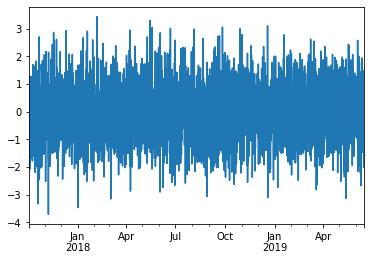

In [13]:
dates = pd.date_range("2017-10-3",pd.datetime.today(), freq="4 H")
pd.Series(np.random.randn(len(dates)),index = dates).plot()

# Aller plus loin avec les dates

- On peut définir avec pandas des fuseaux horaires
    - On utilise `.tz_localize("Europe/Paris")`
    - On peut changer de fuseau horaire avec `.tz_convert()`

- On peut aussi travailler sur des périodes plutôt que sur des dates
    - On utilise `pd.period_range()`


In [14]:
heures = pd.date_range("2017-10-3",periods=100, 
                       freq="4 H",tz="Europe/Paris")


In [15]:
heures_ny = heures.tz_convert("America/New_York")

In [16]:
heures_ny

DatetimeIndex(['2017-10-02 18:00:00-04:00', '2017-10-02 22:00:00-04:00',
               '2017-10-03 02:00:00-04:00', '2017-10-03 06:00:00-04:00',
               '2017-10-03 10:00:00-04:00', '2017-10-03 14:00:00-04:00',
               '2017-10-03 18:00:00-04:00', '2017-10-03 22:00:00-04:00',
               '2017-10-04 02:00:00-04:00', '2017-10-04 06:00:00-04:00',
               '2017-10-04 10:00:00-04:00', '2017-10-04 14:00:00-04:00',
               '2017-10-04 18:00:00-04:00', '2017-10-04 22:00:00-04:00',
               '2017-10-05 02:00:00-04:00', '2017-10-05 06:00:00-04:00',
               '2017-10-05 10:00:00-04:00', '2017-10-05 14:00:00-04:00',
               '2017-10-05 18:00:00-04:00', '2017-10-05 22:00:00-04:00',
               '2017-10-06 02:00:00-04:00', '2017-10-06 06:00:00-04:00',
               '2017-10-06 10:00:00-04:00', '2017-10-06 14:00:00-04:00',
               '2017-10-06 18:00:00-04:00', '2017-10-06 22:00:00-04:00',
               '2017-10-07 02:00:00-04:00', '2017-1

# Le DataFrame 

- Les DataFrame sont des objets très souples pouvant être construits de différentes façon
- On peut les construire en récupérant des données copier / coller, où directement sur Internet, ou en entrant les valeurs manuellement


- Les DataFrame se rapprochent des dictionnaires et on peut construire ces objets en utilisant `DataFrame(dico)`
- De nombreux détails sur la création des DataFrame se trouve sur ce site :

<http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html>


# Construction de DataFrame

On peut simplement construire un DataFrame avec le classe pd.DataFrame() à partir de différentes structures :

In [17]:
frame1=pd.DataFrame(np.random.randn(50).reshape(10,5),
             index=["obs_"+str(i) for i in range(10)],
             columns=["col_"+str(i) for i in range(5)])
frame1

,col_0,col_1,col_2,col_3,col_4
obs_0,0.275381,-0.974449,0.218471,-1.001049,0.131040
obs_1,-0.487671,-1.100481,-0.367914,-0.250400,-0.548808
obs_2,-0.983131,0.012241,2.463682,-0.232389,1.062466
obs_3,-0.613997,-1.998666,0.184564,-0.455338,-0.639762
obs_4,0.582533,-0.720515,-1.091361,1.951128,-1.178915
obs_5,-0.414957,0.725804,-0.316276,-2.022883,0.916293
obs_6,-0.337437,-0.072027,0.684962,0.636029,0.465172
obs_7,0.231095,-0.835728,-0.973705,-0.035238,-2.301622
obs_8,-0.366260,0.352699,0.583001,3.267249,-0.584741
obs_9,-0.830624,-1.445322,1.425922,-0.011785,3.342750


In [18]:
frame1.shape

(10, 5)

In [19]:
frame1.columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4'], dtype='object')

In [20]:
frame1.index

Index(['obs_0', 'obs_1', 'obs_2', 'obs_3', 'obs_4', 'obs_5', 'obs_6', 'obs_7',
       'obs_8', 'obs_9'],
      dtype='object')

# Opérations sur les DataFrame

On peut afficher le nom des colonnes :

In [21]:
print(frame1.columns)

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4'], dtype='object')


On peut accéder à une colonne avec :
- `frame1.col_0` : attention au cas de nom de colonnes avec des espaces...
- `frame1['col_0']`

On peut accéder à une cellule avec :
- `frame1.loc['obs1','col_0']` : on utilise les index et le nom des colonnes
- `frame1.iloc[1,0]` : on utilise les positions dans le DataFrame


In [22]:
nom_col = ["col_1","col_3"]

In [23]:
frame1[nom_col]

,col_1,col_3
obs_0,-0.974449,-1.001049
obs_1,-1.100481,-0.250400
obs_2,0.012241,-0.232389
obs_3,-1.998666,-0.455338
obs_4,-0.720515,1.951128
obs_5,0.725804,-2.022883
obs_6,-0.072027,0.636029
obs_7,-0.835728,-0.035238
obs_8,0.352699,3.267249
obs_9,-1.445322,-0.011785


In [24]:
frame1.col_1

obs_0   -0.974449
obs_1   -1.100481
obs_2    0.012241
obs_3   -1.998666
obs_4   -0.720515
obs_5    0.725804
obs_6   -0.072027
obs_7   -0.835728
obs_8    0.352699
obs_9   -1.445322
Name: col_1, dtype: float64

In [25]:
frame1.loc["obs_3","col_1"]

-1.9986659540142355

In [26]:
frame1.iloc[3,1]

-1.9986659540142355

# Options de visualisation et de résumé

Pour afficher les 3 premières lignes, on peut utiliser :


In [27]:
frame1.head(3)

,col_0,col_1,col_2,col_3,col_4
obs_0,0.275381,-0.974449,0.218471,-1.001049,0.131040
obs_1,-0.487671,-1.100481,-0.367914,-0.250400,-0.548808
obs_2,-0.983131,0.012241,2.463682,-0.232389,1.062466


Pour afficher un résumé du DF :

In [28]:
frame1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, obs_0 to obs_9
Data columns (total 5 columns):
col_0    10 non-null float64
col_1    10 non-null float64
col_2    10 non-null float64
col_3    10 non-null float64
col_4    10 non-null float64
dtypes: float64(5)
memory usage: 800.0+ bytes


# Importer des données externes

Pandas est l'outil le plus efficace pour importer des données externes, il prend en charge de nombreux formats dont csv, Excel, SQL, SAS...


## Importation de données avec Pandas

Quel que soit le type de fichier, Pandas possède une fonction :
```python
frame=pd.read_...('chemin_du_fichier/nom_du_fichier',...)
```
Pour écrire un DataFrame dans un fichier, on utilise :
```python
frame.to_...('chemin_du_fichier/nom_du_fichier',...)
```

**Exercice :**
    
Importer un fichier `.csv` avec `pd.read_csv()`. On utilisera le fichier "./data/airbnb.csv"

In [29]:
airbnb = pd.read_csv("https://www.stat4decision.com/airbnb.csv")

C:\Users\s4d-asus-14\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20190507030954,2019-05-07,zen and calm,Appartement très calme de 50M2 Utilisation de ...,I bedroom appartment in Paris 14,I bedroom appartment in Paris 14 Good restaura...,none,Good restaurants very close the Montparnasse S...,...,f,f,flexible,f,f,1,1,0,0,0.28
1,5396,https://www.airbnb.com/rooms/5396,20190507030954,2019-05-08,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","Small, well appointed studio apartment at the ...","Cozy, well-appointed and graciously designed s...",none,"You are within walking distance to the Louvre,...",...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,1.44
2,7397,https://www.airbnb.com/rooms/7397,20190507030954,2019-05-07,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",PLEASE ASK ME BEFORE TO MAKE A REQUEST !!! No ...,"VERY CONVENIENT, WITH THE BEST LOCATION ! PLEA...",none,NaN,...,f,f,moderate,f,f,1,1,0,0,2.47
3,8522,https://www.airbnb.com/rooms/8522,20190507030954,2019-05-08,GREAT FLAT w/ CITY VIEW,NaN,Really nice flat located in the 20th district ...,Really nice flat located in the 20th district ...,none,NaN,...,f,f,moderate,f,f,1,1,0,0,0.01
4,9359,https://www.airbnb.com/rooms/9359,20190507030954,2019-05-07,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,"Since I live in the USA, it is difficult to ma...",Location! Location! Location! Just bring your ...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,NaN


In [31]:
airbnb.shape

(59126, 106)

In [32]:
airbnb.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59126 entries, 0 to 59125
Data columns (total 106 columns):
id                                              int64
listing_url                                     object
scrape_id                                       int64
last_scraped                                    object
name                                            object
summary                                         object
space                                           object
description                                     object
experiences_offered                             object
neighborhood_overview                           object
notes                                           object
transit                                         object
access                                          object
interaction                                     object
house_rules                                     object
thumbnail_url                                   float64
medium_url 

**Exercice :**

Importer les données communes.txt

In [33]:
communes = pd.read_csv("./data/Communes.txt",sep="|")

In [34]:
communes.head()

,commune,libelle_commune,departement_insee_3
0,$,NON RENSEIGNE,$
1,-,SANS OBJET,-
2,01001,L'ABERGEMENT-CLEMENCIAT,001
3,01002,L'ABERGEMENT-DE-VAREY,001
4,01003,AMAREINS,001


In [35]:
communes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38922 entries, 0 to 38921
Data columns (total 3 columns):
commune                38922 non-null object
libelle_commune        38922 non-null object
departement_insee_3    38922 non-null object
dtypes: object(3)
memory usage: 912.3+ KB


In [36]:
# on ectrait les communes du département insee 002
communes002 = communes[communes["departement_insee_3"]=="002"]

In [37]:
communes003 = communes.query("departement_insee_3 =='003'")

# D'autres types de données

## JSON
Les objets JSON ressemblent à des dictionnaires.

On utilise le module `json` puis la fonction `json.loads()` pour transformer une entrée JSON en objet json

Si le fichier a un format `json` bien construit on peut utiliser `pd.read_json()`

## HTML
On utilise `pd.read_html(url)`. Cet fonction est basée sur les packages `beautifulsoup` et `html5lib`

Cette fonction renvoie une liste de DataFrame qui représentent tous les DataFrame de la page. On ira ensuite chercher l'élément qui nous intéresse avec `frame_list[0]`

**Exercice :**
    
Importez un tableau en html depuis la page <http://www.fdic.gov/bank/individual/failed/banklist.html>

In [38]:
bank = pd.read_html("http://www.fdic.gov/bank/individual/failed/banklist.html")

In [39]:
type(bank)

list

In [40]:
len(bank)

1

In [41]:
bank[0].head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,The Enloe State Bank,Cooper,TX,10716,"Legend Bank, N. A.","May 31, 2019","June 5, 2019"
1,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,"December 15, 2017","February 1, 2019"
2,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,"October 13, 2017","February 21, 2018"
3,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb","May 26, 2017","January 29, 2019"
4,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,"May 5, 2017","March 22, 2018"


**Exercice :**
Importer les données Service.json

In [42]:
service = pd.read_json("./data/Service.json")

In [43]:
service.head()

,Clef,discip,disrecru,h_faites,h_horens,h_reduc,heurant,heurens,heurloc,heurpond,heurpond_retenues,heursup,modalite,quotite,serv_th,servimax
0,F2lnacdarwP3HCF,L1900,1900E,21.0,3.0,NaN,0,18.0,0,0.0,0.0,1.0,TC,100.0,20.0,20.0
1,Gg3Ud2SPdY8Gdm9,C0072,0072R,23.0,0.0,NaN,0,23.0,0,0.0,0.0,2.0,TC,100.0,21.0,21.0
2,qdQLaHGhQNdKtox,P5200,5200J,19.0,1.0,NaN,0,18.0,0,0.0,0.0,1.0,TC,100.0,18.0,18.0
3,ff41lvlgjXzK9Cv,P0210,0210J,14.9,0.0,NaN,0,14.9,0,-0.5,-0.5,NaN,MF,80.0,14.4,18.0
4,6V7vA8L3DeI13SN,L1900,1900A,18.0,3.0,NaN,0,15.0,0,0.0,0.0,1.0,TC,100.0,17.0,17.0


In [44]:
service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361231 entries, 0 to 361230
Data columns (total 16 columns):
Clef                 361231 non-null object
discip               361231 non-null object
disrecru             361231 non-null object
h_faites             361231 non-null float64
h_horens             361231 non-null float64
h_reduc              21982 non-null float64
heurant              361231 non-null int64
heurens              361231 non-null float64
heurloc              361231 non-null int64
heurpond             361182 non-null float64
heurpond_retenues    361231 non-null float64
heursup              237337 non-null float64
modalite             361231 non-null object
quotite              361231 non-null float64
serv_th              361231 non-null float64
servimax             361231 non-null float64
dtypes: float64(10), int64(2), object(4)
memory usage: 44.1+ MB


In [45]:
service["modalite"].value_counts(normalize=True)

TC    0.919448
TP    0.055264
MF    0.019209
MT    0.002165
MS    0.001631
TB    0.001470
FE    0.000540
TE    0.000238
CA    0.000036
Name: modalite, dtype: float64

In [46]:
service[["h_faites","h_horens"]].mean()

h_faites    17.749159
h_horens     0.415532
dtype: float64

In [47]:
service[["h_faites",
         "h_horens"]].agg(["mean",
                            "var"])

,h_faites,h_horens
mean,17.749159,0.415532
var,11.949470,1.723046


In [48]:
service[["h_faites","h_horens"]].describe()

,h_faites,h_horens
count,361231.000000,361231.000000
mean,17.749159,0.415532
std,3.456800,1.312649
min,0.500000,0.000000
25%,16.500000,0.000000
50%,18.450000,0.000000
75%,20.000000,0.000000
max,44.000000,25.000000


## Calcul de statistiques pondérées

In [50]:
from statsmodels.stats.weightstats import DescrStatsW

In [51]:
stat_pond = DescrStatsW(service["h_faites"],weights=service["h_horens"])

In [52]:
stat_pond.mean

19.575677399931628

In [53]:
stat_pond.var

7.753062420312817

# Importer depuis Excel

On a deux approches pour Excel :
- On peut utiliser `pd.read_excel()`
- On peut utiliser la classe `pd.ExcelFile()`

Dans ce cas, on utilise :
```python
xlsfile=pd.ExcelFile('fichier.xlsx')
xlsfile.parse('Sheet1')
```

**Exercice :** 
    
Importez un fichier Excel avec les deux approches, on utilisera : `credit2.xlsx` et `ville.xls`

In [54]:
credit = pd.read_excel("./data/credit2.xlsx")

In [55]:
# on crée un objet de la classe ExcelFile
ville_excel = pd.ExcelFile("./data/ville.xls")

In [56]:
ville_excel.sheet_names

['ville', 'ville-ain']

In [57]:
# on extrait la feuille du classeur en utilisant l'objet
frame_ville = ville_excel.parse(ville_excel.sheet_names[0])

In [58]:
frame_ville.head()

,NomVille,MAJ,Code Postal,Code INSEE,Code Région,Latitude,Longitude,Eloignement
0,Saint-Denis-lès-Bourg,SAINT DENIS LES BOURG,1000,1344,82,46.200000,5.200000,1
1,Bourg-en-Bresse,BOURG EN BRESSE,1000,1053,82,46.200000,5.216667,1
2,Lurcy,LURCY,1090,1225,82,46.066667,4.766667,1.97
3,Montmerle-sur-Saône,MONTMERLE SUR SAONE,1090,1263,82,46.083333,4.766667,1.97
4,Genouilleux,GENOUILLEUX,1090,1169,82,46.116667,4.783333,1.91


In [59]:
frame_ville.columns

Index(['NomVille', 'MAJ   ', ' Code Postal ', ' Code INSEE ', 'Code Région',
       ' Latitude ', ' Longitude ', ' Eloignement '],
      dtype='object')

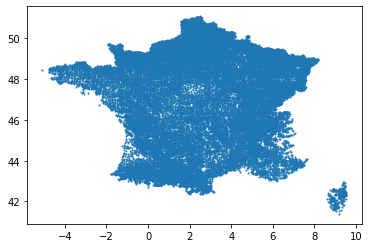

In [60]:
import matplotlib.pyplot as plt
plt.scatter(" Longitude "," Latitude ", data=frame_ville, s=1)

# Importer des données SQL

Pandas possède une fonction `read_sql()` qui permet d’importer directement des bases de données ou des queries dans des DataFrame

Il faut tout de même un connecteur pour accéder aux bases de données

Pour mettre en place ce connecteur, on utlise le package SQLAlchemy.

Suivant le type de base de données, on utilisera différents codes mais la structure du code est toujours la même

In [61]:
# on importe l'outil de connexion
from sqlalchemy import create_engine

On crée une connexion
```python
connexion=create_engine("sqlite:///(...).sqlite")
```

On utlise une des fonctions de Pandas pour charger les données
```python
requete="""select ... from ..."""
frame_sql=pd.read_sql_query(requete,connexion)
```

**Exercices :**
    
Importez la base de données SQLite salaries et récupérez la table Salaries dans un DataFrame 

In [62]:
conn = create_engine("sqlite:///./data/salaries.sqlite")

In [63]:
conn.table_names()

['Salaries']

In [64]:
salaries = pd.read_sql_query("select * from salaries",con = conn)

In [65]:
salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,


## Importer depuis SAS

Si vous avez des données venant de SAS, vous pouvez bien entendu les exporter en csv... mais pandas possède une fonction `pd.read_sas()`

Attention le format d'encodage pourra être important, on utilise généralement  `iso-8859-1`

**Exercice :**
    
Récupérer le fichier bce_uai dans un dataframe

In [66]:
bce_uai = pd.read_sas("./data/bce_uai.sas7bdat",encoding="iso-8859-1")

In [67]:
bce_uai.head()

,CONTRAT_ETABLISSEMENT,CATEGORIE_JURIDIQUE,ETAT_ETABLISSEMENT,MINISTERE_TUTELLE,NUMERO_UAI,SIGLE_UAI,SECTEUR_PUBLIC_PRIVE,NATURE_UAI,COMMUNE,DATE_OUVERTURE,DATE_FERMETURE,DENOMINATION_PRINCIPALE_UAI,PATRONYME_UAI,NIVEAU_UAI,SECTEUR_CONTRAT
0,99,131,1,06,0010670Y,E.P.PU,PU,151,01001,1966-09-30,NaT,ECOLE PRIMAIRE PUBLIQUE,NaN,1,01
1,30,999,1,06,0010093W,E.P.PR,PR,151,01004,1971-03-12,NaT,ECOLE PRIMAIRE PRIVEE,STE MARIE,1,03
2,99,131,1,06,0011207G,E.E.PU,PU,151,01004,1984-09-01,NaT,ECOLE ELEMENTAIRE PUBLIQUE,JULES FERRY,1,01
3,99,200,1,06,0010001W,LP LYC METIER,PU,320,01004,1965-05-01,NaT,LP LYCEE DES METIERS,ALEXANDRE BERARD,1,01
4,99,131,1,06,0010445D,E.M.PU,PU,101,01004,1966-10-07,NaT,ECOLE MATERNELLE PUBLIQUE,JEAN JAURES,1,01


In [68]:
bce_uai["JOUR_OUVERTURE"] = bce_uai["DATE_OUVERTURE"].dt.day_name()

In [69]:
bce_uai["JOUR_OUVERTURE"].value_counts()

Monday       11782
Saturday     11011
Wednesday    10867
Tuesday      10688
Friday       10529
Thursday      9913
Sunday        2651
Name: JOUR_OUVERTURE, dtype: int64

# Les tris avec Pandas 

Pour effectuer des tris, on utilise :
- `.sort_index()` pour le tri des index
- `.sort_values()` pour le tri des données
- `.rank()` affiche le rang des observations

Il peut y avoir plusieurs tris dans la même opération. Dans ce cas, on utilise des listes de colonnes :
```python
frame.sort_values(["col_1","col_2"])
```

**Exercice :** 
    
Triez les données sur les salaires en se basant sur le BasePay et le JobTitle

In [75]:
salaries.sort_values(by=["JobTitle","TotalPay"],ascending=[True,False])

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
20765,20766,NAPOLEON VIRAY,ACCOUNT CLERK,NaN,0,0,,60838.20,60838.20,2011,,San Francisco,
20867,20868,BERNADETTE RAMOS,ACCOUNT CLERK,NaN,10753.1,0,,60530.87,60530.87,2011,,San Francisco,
21638,21639,SUSAN CHANG,ACCOUNT CLERK,NaN,5406.34,1814.58,,58527.20,58527.20,2011,,San Francisco,
22972,22973,OLIVIA BOUDREAUX,ACCOUNT CLERK,NaN,3811.68,1084.76,,54674.59,54674.59,2011,,San Francisco,
24132,24133,LI-XIN CAI,ACCOUNT CLERK,NaN,1390.45,624,,51792.25,51792.25,2011,,San Francisco,
24174,24175,LOLA THOMAS,ACCOUNT CLERK,NaN,1356.88,622.87,,51670.27,51670.27,2011,,San Francisco,
24264,24265,TUONG TRUONG,ACCOUNT CLERK,NaN,0,1618,,51395.80,51395.80,2011,,San Francisco,
24329,24330,AUDREY LEONG,ACCOUNT CLERK,NaN,0,1440,,51217.78,51217.78,2011,,San Francisco,
24364,24365,WINNIE FUNG,ACCOUNT CLERK,NaN,0,1300,,51077.78,51077.78,2011,,San Francisco,
24374,24375,ELAINE QUAN,ACCOUNT CLERK,NaN,0,1285.5,,51063.32,51063.32,2011,,San Francisco,


In [76]:
salaries

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,NaN,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),NaN,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),NaN,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,NaN,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",NaN,9737,182235,,326373.19,326373.19,2011,,San Francisco,
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,NaN,8601,189083,,316285.74,316285.74,2011,,San Francisco,
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",NaN,89062.9,134426,,315981.05,315981.05,2011,,San Francisco,
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,NaN,0,51322.5,,307899.46,307899.46,2011,,San Francisco,
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",NaN,86362.7,40132.2,,303427.55,303427.55,2011,,San Francisco,
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",NaN,0,17115.7,,302377.73,302377.73,2011,,San Francisco,


# Les statistiques simples

Les Dataframe possèdent de nombreuses méthodes pour calculer des statistiques simples :
- `.sum(axis=0)` permet de faire une somme par colonne
- `.sum(axis=1)` permet de faire une somme par ligne
- `.min()` et `.max()` donnent le minimum par colonne
- `.idxmin()` et `.idxmax()` donnent l’index du minimum et du maximum
- `.describe()` affiche un tableau de statistiques descriptives par colonne
- `.corr()` pour calculer la corrélation entre les colonnes

**Exercice :**
    
Obtenir les différentes statistiques descriptives pour les données AirBnB.


In [77]:
salaries.corr()

,Id,BasePay,TotalPay,TotalPayBenefits,Year
Id,1.000000,NaN,-0.211478,-0.092190,0.968171
BasePay,NaN,NaN,NaN,NaN,NaN
TotalPay,-0.211478,NaN,1.000000,0.977313,0.032090
TotalPayBenefits,-0.092190,NaN,0.977313,1.000000,0.151947
Year,0.968171,NaN,0.032090,0.151947,1.000000


# Le traitement des données manquantes

- Les données manquantes sont identifiées par `NaN`


- `.dropna()` permet de retirer les données manquantes dans un objet Series et l’ensemble d’une ligne dans le cas d’un DataFrame
- Pour éliminer par colonne, on utilise `.dropna(axis=1)`
- Remplacer toutes les données manquantes `.fillna(valeur)`


# Les jointures avec Pandas

On veut joindre des jeux de données en utilisant des clés (variables communes)

- `pd.merge()` permet de joindre deux DataFrame, on utilise comme options `on='key'`

- On peut utiliser comme option `how=`, on peut avoir :
    - `left` dans ce cas, on garde le jeu de données à gauche et pour les données de droite des valeurs manquantes sont ajoutées.
    - `outer`, on garde toutes les valeurs des deux jeux de données
    - ...

- On peut avoir plusieurs clés et faire une jointure sur les deux clés `on=['key1','key2']`

Pour plus de détails : <http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.merge.html>


**Exercice :**
    
Joindre deux dataframes (credit1 et credit2).


In [78]:
credit1 = pd.read_csv("./data/credit1.txt",sep="\t")
credit2 = pd.read_excel("./data/credit2.xlsx")

In [79]:
credit1.head()

,Months_as_a_Customer,Number_of_Products,RFM_Score,Average_Balance_Feed_Index,Number_of_Transactions,Personal_Debt_to_Equity_Ratio,Months_Current_Account,Number_of_Loan_Accounts,Customer_ID,Has_Bad_Payment_Record,...,Weeks_Since_Last_Offer,Accepted_Personal_Loan,Accepted_Retention,Accepted_Home_Equity_Loan,Accepted_Credit_Card,Annual_value,Interested_in_Personal_Loan,Interested_in_Retention,Interested_in_Home_Equity_Loan,Interested_in_Credit_Card
0,24,3,10,229,2,40,13,0,5409,0,...,17,F,F,F,F,90,F,F,F,F
1,12,2,12,8,1,47,5,2,5477,0,...,22,F,F,F,F,260,F,F,F,F
2,36,0,0,0,0,35,31,0,5507,0,...,27,F,F,T,T,0,F,F,T,F
3,0,0,0,0,0,45,-3,0,8,0,...,51,F,F,F,F,0,F,T,F,F
4,48,0,0,0,0,13,39,0,158,0,...,8,F,F,F,F,0,F,F,T,F


In [80]:

credit_merged = pd.merge(credit1,credit2,on="Customer_ID")

credit_merged2 = credit1.merge(credit2,on="Customer_ID")

#credit.join([credit2,credit3],on="id")

In [81]:
credit_merged.head()

,Months_as_a_Customer,Number_of_Products,RFM_Score,Average_Balance_Feed_Index,Number_of_Transactions,Personal_Debt_to_Equity_Ratio,Months_Current_Account,Number_of_Loan_Accounts,Customer_ID,Has_Bad_Payment_Record,...,Interested_in_Credit_Card,Age,Gender,Marital_Status,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income,Homeowner
0,24,3,10,229,2,40,13,0,5409,0,...,F,40,F,S,11,6,37,56,37073,F
1,12,2,12,8,1,47,5,2,5477,0,...,F,47,M,M,13,13,30,56,50721,F
2,36,0,0,0,0,35,31,0,5507,0,...,F,35,F,U,1,9,33,57,43578,T
3,0,0,0,0,0,45,-3,0,8,0,...,F,45,M,U,15,7,30,62,69553,F
4,48,0,0,0,0,13,39,0,158,0,...,F,13,F,S,0,7,27,64,37502,T


In [82]:
credit1.shape[0] == credit2.shape[0] == credit_merged.shape[0]

True

# Gestion des duplications

- On utilise `.duplicated()` ou `.drop_duplicates()` dans le cas où on désire effacer les lignes se répétant


- On peut se concentrer sur une seule variables en entrant directement le nom de la variable. Dans ce cas, c’est la première apparition qui compte. Si on veut prendre la dernière apparition, on utilise l’option `keep="last"`. On pourra avoir :
```python
frame1.drop_duplicates(["col_0","col_1"],keep="last")
```

# Discrétisation

Pour discrétiser, on utilise la fonction `pd.cut()`, on va définir une liste de points pour discrétiser et on entre cette liste comme second paramètre de la fonction.

Une fois discrétisé, on peut afficher les modalités obtenues en utilisant `.categories`

On peut aussi compter les occurrence en utilisant `pd.value_counts()`

Il est aussi possible d’entrer le nombre de segments comme second paramètre

On utilisera aussi `qcut()`

**Exercice :**
    
Créez une variable dans le dataframe AirBnB pour obtenir des niveaux de prix.


In [83]:
import re
airbnb["price_num"]=pd.to_numeric(airbnb["price"].str[1:]
                                  .str.replace(",",""))

In [84]:
airbnb["price_num"].describe()

count    59126.000000
mean       116.325982
std        167.669754
min          0.000000
25%         59.000000
50%         80.000000
75%        120.000000
max       9379.000000
Name: price_num, dtype: float64

In [85]:
airbnb.iloc[airbnb["price_num"].idxmax()]["price"]

'$9,379.00'

In [86]:
airbnb["price_disc"]= pd.cut(airbnb["price_num"],5,labels=(1,2,3,4,5))

In [87]:
airbnb["price_disc2"]= pd.qcut(airbnb["price_num"],5)

In [88]:
airbnb["price_disc2"].value_counts()

(94.0, 140.0]      12338
(53.0, 70.0]       12226
(-0.001, 53.0]     11933
(70.0, 94.0]       11408
(140.0, 9379.0]    11221
Name: price_disc2, dtype: int64

# Les tableaux croisés avec Pandas

Les DataFrame possèdent des méthodes pour générer des tableaux croisés, notamment :
```python
frame1.pivot_table()
```
Cette méthode permet de gérer de nombreux cas avec des fonctions standards et sur mesure.

In [89]:
airbnb.cancellation_policy

0                           flexible
1        strict_14_with_grace_period
2                           moderate
3                           moderate
4        strict_14_with_grace_period
5        strict_14_with_grace_period
6        strict_14_with_grace_period
7        strict_14_with_grace_period
8        strict_14_with_grace_period
9                           moderate
10                          flexible
11       strict_14_with_grace_period
12       strict_14_with_grace_period
13                          moderate
14       strict_14_with_grace_period
15                          moderate
16                          flexible
17       strict_14_with_grace_period
18                          flexible
19       strict_14_with_grace_period
20                          moderate
21       strict_14_with_grace_period
22       strict_14_with_grace_period
23                          moderate
24                          moderate
25                          moderate
26       strict_14_with_grace_period
2

**Exercice :**
    
Afficher un tableau Pivot pour les données AirBnB.

In [90]:
airbnb.pivot_table(values="price_num",index = "room_type", 
                   columns = "cancellation_policy")

cancellation_policy,flexible,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60
room_type,,,,,,
Entire home/apt,95.350408,104.016005,63.0,141.510807,253.656250,590.639286
Private room,109.948313,125.259901,NaN,92.999418,541.363636,440.000000
Shared room,73.564220,40.887324,NaN,64.224719,NaN,NaN


In [91]:
airbnb.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59126 entries, 0 to 59125
Data columns (total 109 columns):
id                                              int64
listing_url                                     object
scrape_id                                       int64
last_scraped                                    object
name                                            object
summary                                         object
space                                           object
description                                     object
experiences_offered                             object
neighborhood_overview                           object
notes                                           object
transit                                         object
access                                          object
interaction                                     object
house_rules                                     object
thumbnail_url                                   float64
medium_url 

# L'utilisation de GroupBy sur des DataFrame

- `.groupby` permet de rassembler des observations en fonction d’une variable dite de groupe


- Par exemple, `frame.groupby('X').mean()` donnera les moyennes par groupes de `X`


- On peut aussi utiliser `.size()` pour connaître la taille des groupes et utiliser d’autres fonctions (`.sum()`)


- On peut effectuer de nombreuses opérations de traitement avec le groupby


**Exercice :**
    
- Données sur les salaires


- On utilise le `groupby()` pour rassembler les types d’emploi


- Et on calcule des statistiques pour chaque type


On peut utiliser la méthode `.agg()` avec par exemple `'mean'` comme paramètre

On utilise aussi fréquemment la méthode `.apply()` combinée à une fonction lambda

In [92]:
airbnb_group = airbnb.groupby("room_type")

In [93]:
airbnb_group["price_num","review_scores_rating"].mean()

,price_num,review_scores_rating
room_type,,
Entire home/apt,117.270613,92.884920
Private room,113.091139,93.173706
Shared room,65.036403,90.774096


In [94]:
airbnb_group["price_num",
             "review_scores_rating"].agg(["mean",
                                          "std",
                                          "median"])

price_num                    review_scores_rating  \
                       mean         std median                 mean   
room_type                                                             
Entire home/apt  117.270613  155.259620   85.0            92.884920   
Private room     113.091139  229.457124   55.0            93.173706   
Shared room       65.036403  262.244490   34.0            90.774096   

                                   
                       std median  
room_type                          
Entire home/apt   8.308599   95.0  
Private room      8.453961   95.0  
Shared room      11.230092   93.0

In [95]:
airbnb_group["price_num",
             "review_scores_rating"].apply(lambda x: x.max()-x.min())

,price_num,review_scores_rating
room_type,,
Entire home/apt,9379.0,80.0
Private room,8924.0,80.0
Shared room,4991.0,80.0
